**Import libraries**

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error

# **Logistic Regression**

#Task 1: Load and describe Dataset

In [97]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


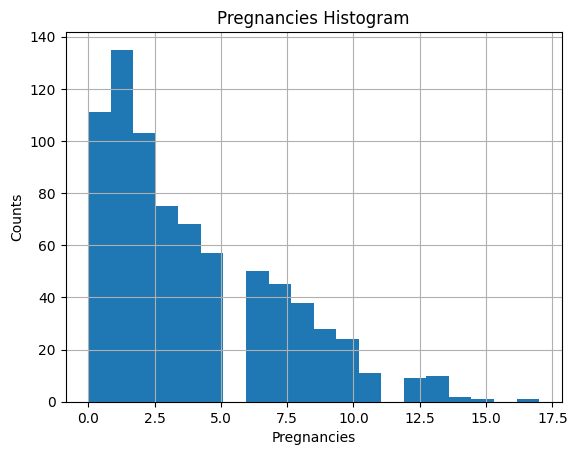

In [100]:
df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

This histogram illustrates the distribution of pregnancies, with the largest segment corresponding to individuals with 1 pregnancy, followed closely by those with no pregnancies (0). Together, they dominate the chart, indicating that most individuals have either 0 or 1 pregnancy. We can observe that in this dataset  the number of lower pregnancies is more common.

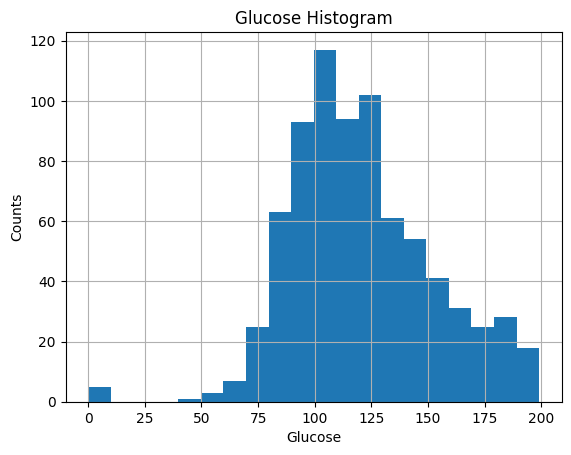

In [101]:
df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

The histogram shows that the majority of glucose levels fall within the normal range, around 85–125 mg/dL. We can also observe that there are several outliers, including zeros. These are biologically implausible and likely indicate missing or incorrect data, requiring handling during data cleaning and preprocessing.

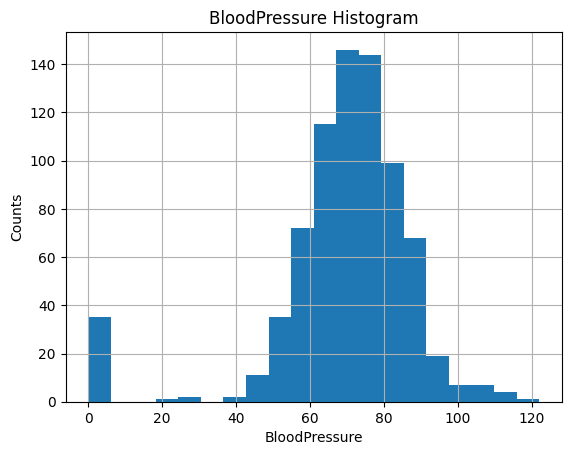

In [102]:
df['BloodPressure'].hist(bins=20)
plt.title('BloodPressure Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

In the histogram it is illustrated that blood pressure values are concentrated within the normal range of 60–80 mmHg. We can also observe that there are several outliers, particularly low values, including zeros which are biologically implausible and need to be removed.

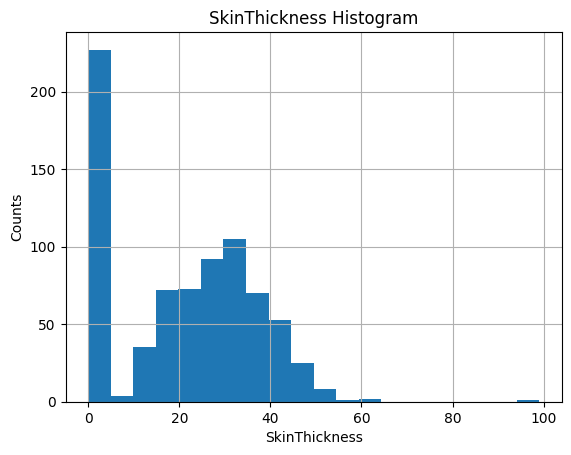

In [103]:
df['SkinThickness'].hist(bins=20)
plt.title('SkinThickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

The majority of skin thickness values lie between 20 and 40. There are also numerous outliers, particularly zero values, that need to be removed.

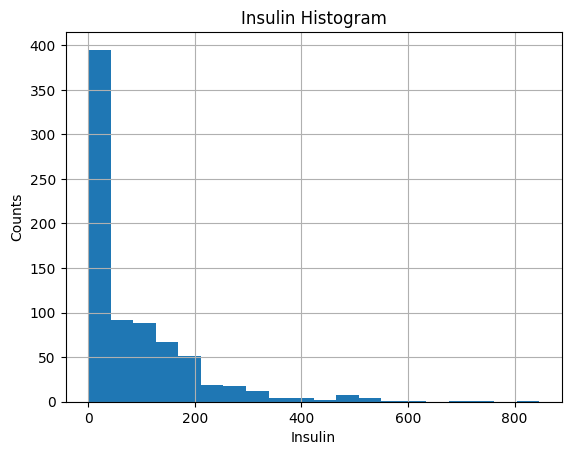

In [104]:
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

It is evident that the majority of values are falling below 200. A large portion of the dataset contains zero values, which are biologically implausible and likely are missing or incorrect data.

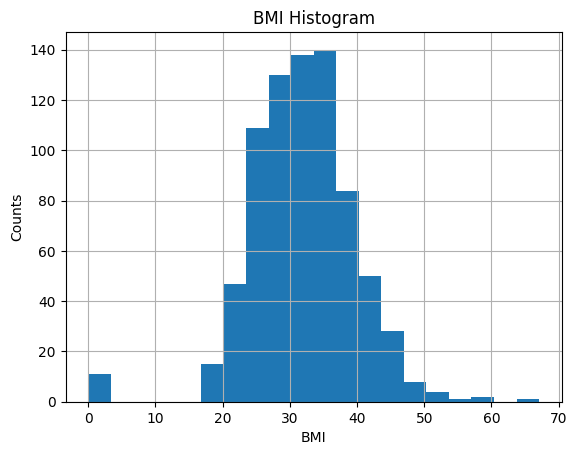

In [105]:
df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

Most BMI values are concentrated  between 25 and 40, again we can observe some zero values that require data cleaning.

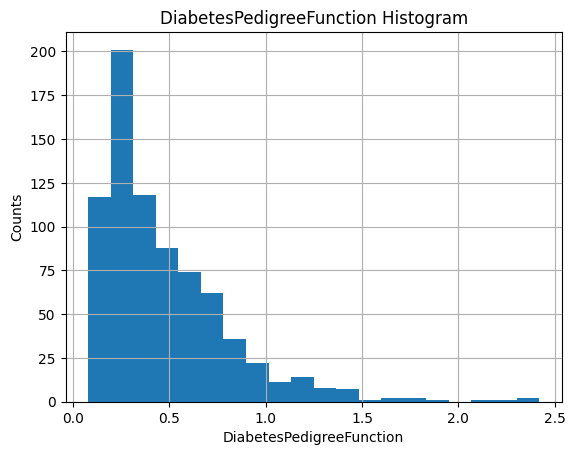

In [106]:
df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('DiabetesPedigreeFunction Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

Most values are concentrated between 0 and 0.5, there are also some outliers outliers above 1.0.



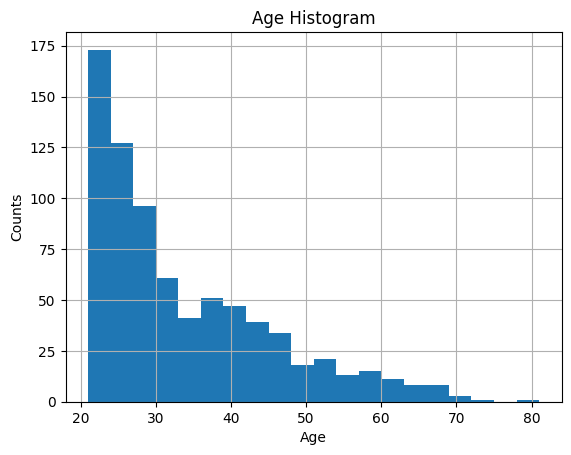

In [107]:
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

We can see that the majority of individuals in this dataset are younger, particularly in the range of 20–30 years. There are outliers that are older individuals and may influence the analysis.

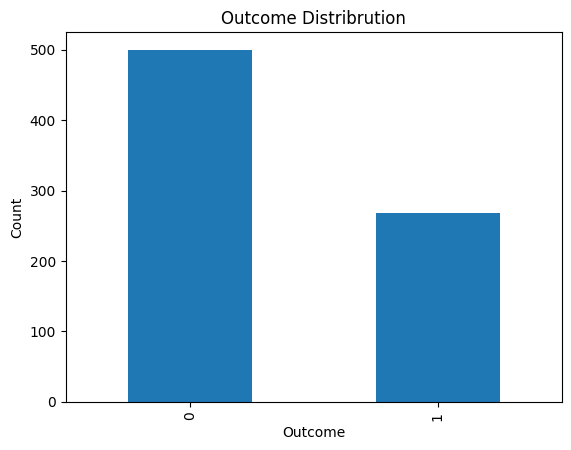

In [108]:
counts = df['Outcome'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Distribrution')
plt.show()

# Task 2: Dataset quality assesment

The dataset contains many zero values in some features ( for example: Blood Pressure, Insulin, Skin Thickness), which likely indicate missing data. There is also a significant number of upper outliers in the Skin Thickness feature. These issues can bias the model and reduce predictive accuracy unless they are properly handled through imputation or removal.

In addition, the distribution of the Age feature consists mostly of younger individuals, making older ones outliers. This could lead to sampling bias, making the model less generalizable to older populations and potentially causing poor performance when applied to other datasets.

Therefore, the dataset is not of high quality in its original state and requires preprocessing and cleaning.

# Task 3: Age distribution assesment

The age distribution is heavily right-skewed, with most individuals concentrated between 20 and 30 years, making older ones outliers. As mentioned before this could lead to sampling bias, making the model less generalizable to older populations and potentially causing poor performance when applied to other datasets.


# Task 4

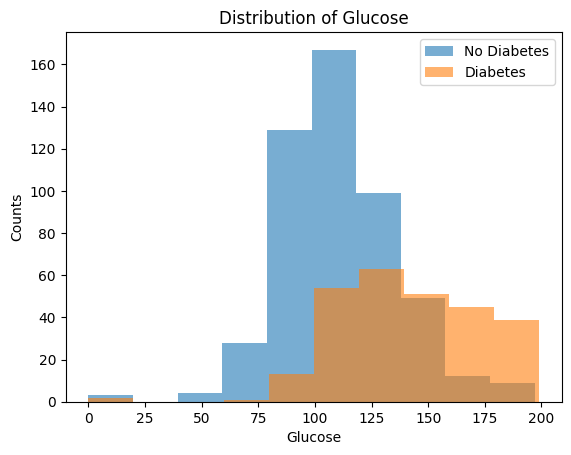

In [109]:
plt.hist(df[df['Outcome']==0]['Glucose'], alpha=0.6, label='No Diabetes')
plt.hist(df[df['Outcome']==1]['Glucose'], alpha=0.6, label='Diabetes')
plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.legend()
plt.show()

This histogram shows the distribution of glucose levels, separated by outcome (0 and 1). For individuals with an outcome of 1 (Diabetes), glucose levels tend to be higher. In contrast, those with an outcome of 0 (No Diabetes) are more concentrated around lower glucose levels. This pattern indicates that higher glucose levels are associated with a greater likelihood of the outcome, supporting the medical observation that patients with elevated glucose levels are more likely to develop diabetes.

#Task 5

**Data preprocessing**

Columns where zeros are not  meaningful (Glucose, BloodPressure, SkinThickness, Insulin, BMI) are replaced with NaN to mark missing values. Rows with missing values are removed to ensure reliable data for model training. Also some missing values are filled using the median of the column (imputation strategy).

In [110]:
# handle missing or invalid values by replacing zeros with NaN for relevant columns
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_invalid_zeros] = df[columns_with_invalid_zeros].replace(0, np.nan)

# drop rows with zeros in Glucose, Blood Pressure and BMI columns, where critical values are missing
df_cleaned = df.dropna(subset=['Glucose', 'BMI','BloodPressure'])
#replace all the rest missing values with mean value of the column (imputation strategy)
df_cleaned = df_cleaned.fillna(df_cleaned.median())

df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   SkinThickness             724 non-null    float64
 4   Insulin                   724 non-null    float64
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.6 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.5,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**Split Dataset to Train-Test**

In [111]:
input_df = df_cleaned.drop(columns=['Outcome'])
targets_df = df_cleaned['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((724, 8), (724,))

In [112]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((506, 8), (506,), (218, 8), (218,))

#Task 6

**Create a Logistic Regression Model**

In [113]:
model = LogisticRegression(max_iter=1000, random_state=seed)

In [114]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [115]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])

**Model evaluation**

In [116]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'Test set accuracy: {accuracy_percentage}')

Test set accuracy: 75.69


In [117]:
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy_percentage = round(train_accuracy*100, 2)

print(f'Training set accuracy: {train_accuracy_percentage}%')

Training set accuracy: 78.26%


Training and test accuracy are close, with only a small drop (~2.5%), which suggests the model is not overfitting significantly.

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       144
           1       0.64      0.66      0.65        74

    accuracy                           0.76       218
   macro avg       0.73      0.73      0.73       218
weighted avg       0.76      0.76      0.76       218



Class 0 (No Diabetes): High precision and recall, indicating the model correctly identifies most non-diabetic cases.

Class 1 (Diabetes): Precision and recall are lower, meaning the model misses some diabetic cases (false negatives) and incorrectly predicts diabetes for some non-diabetic cases (false positives).

The dataset has more instances of non-diabetic patients (class 0) than diabetic patients (class 1). Because the model sees more examples of class 0 during training, it learns patterns for the majority class better.
That’s why the model tends to predict class 0 more accurately.


#Task 7

In [119]:
max_age = int(x_test[:, 7].max())
print("max_age:", max_age)

max_age: 70


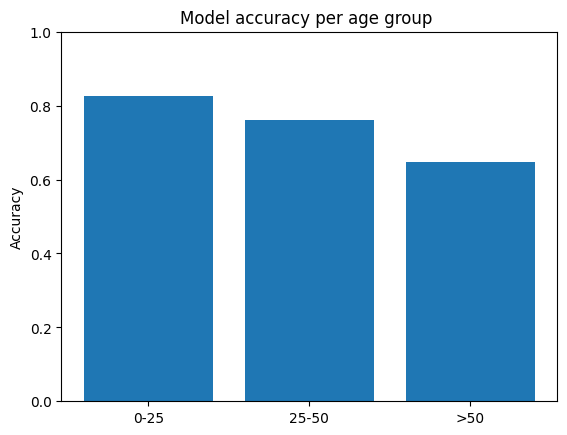

In [120]:
# add 1 to include the max value
bins = [0, 25, 50, max_age+1]
labels = ['0-25', '25-50', '>50']

# create age groups
age_groups = np.digitize(x_test[:,7], bins=bins, right=False)

# accuracy per age group
accuracy_per_group = [accuracy_score(y_test[age_groups == i], model.predict(x_test[age_groups == i]))for i in range(1, len(bins))]

plt.bar(labels, accuracy_per_group)
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model accuracy per age group ')
plt.show()

In [121]:
counts_per_group = [np.sum(age_groups == i) for i in range(1, len(bins))]
for label, acc, count in zip(labels, accuracy_per_group, counts_per_group):
    print(f"Age group {label}: Accuracy = {acc:.2f}, Count = {count}")


Age group 0-25: Accuracy = 0.83, Count = 52
Age group 25-50: Accuracy = 0.76, Count = 129
Age group >50: Accuracy = 0.65, Count = 37


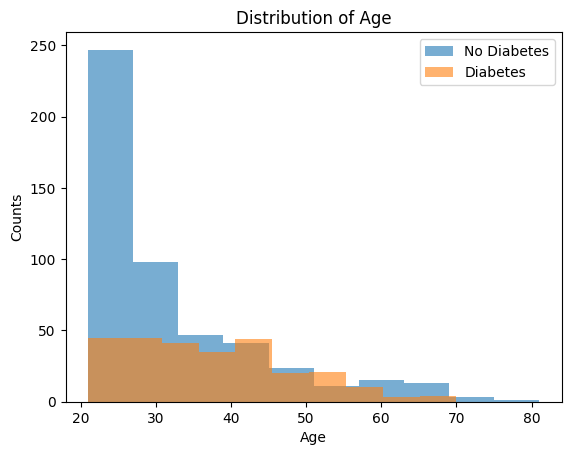

In [122]:
plt.hist(df[df['Outcome']==0]['Age'], alpha=0.6, label='No Diabetes')
plt.hist(df[df['Outcome']==1]['Age'], alpha=0.6, label='Diabetes')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.legend()
plt.show()

As mentioned before, there is a data imbalance in the dataset, there are less samples of older individuals. The older group (>50) here has fewer samples than the rest of the groups, that can explain the low accuracy of the group.

The first group (0-25)has the best accuracy, this group likely has fewer diabetic cases based on the distribution of column age in the original dataset (as we can see above in the chart) and more clear patterns (younger individuals tend to have for example lower glucose, BMI), making predictions easier and more separable.

The group (25-50) is the largest and has moderate accuracy that may be  expected here since there’s a more balanced mix of both diabetic and non-diabetic cases. So slightly lower accuracy than the youngest group makes sense.


# Task 8

False negatives (predicting no diabetes when the patient actually has it) are worse than false positives (predicts diabetes but the patient does not actually have it) in this case, because missing a diabetes diagnosis can lead to serious health consequences, than a false alarm.

#Task 9

In [123]:
input_df = df_cleaned.drop(columns=['Outcome'])
targets_df = df_cleaned['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()

test_size = 0.3
accuracies = []

# loop over seeds 0 to 9
for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    y_train_pred = model.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'Seed {seed}: Test Accuracy = {acc*100:.2f}%')
    print(f'Seed {seed}: Train Accuracy = {train_accuracy*100:.2f}%')

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print(f"Mean Accuracy (Test set): {mean_acc*100:.2f}%")
print(f"Standard Deviation (Test set): {std_acc*100:.2f}%")

Seed 0: Test Accuracy = 75.69%
Seed 0: Train Accuracy = 78.26%
Seed 1: Test Accuracy = 73.39%
Seed 1: Train Accuracy = 79.25%
Seed 2: Test Accuracy = 72.48%
Seed 2: Train Accuracy = 80.24%
Seed 3: Test Accuracy = 71.56%
Seed 3: Train Accuracy = 78.66%
Seed 4: Test Accuracy = 76.61%
Seed 4: Train Accuracy = 77.67%
Seed 5: Test Accuracy = 76.15%
Seed 5: Train Accuracy = 76.88%
Seed 6: Test Accuracy = 72.94%
Seed 6: Train Accuracy = 80.43%
Seed 7: Test Accuracy = 73.39%
Seed 7: Train Accuracy = 78.85%
Seed 8: Test Accuracy = 75.69%
Seed 8: Train Accuracy = 77.87%
Seed 9: Test Accuracy = 78.90%
Seed 9: Train Accuracy = 77.08%
Mean Accuracy (Test set): 74.68%
Standard Deviation (Test set): 2.16%


These results show that the model is stable, generalizes well and that it performs consistently across random splits.

# Task 10

In [124]:
scaler = MinMaxScaler()
# transform the data (min-max normalization)
normalized_data = scaler.fit_transform(input_df)

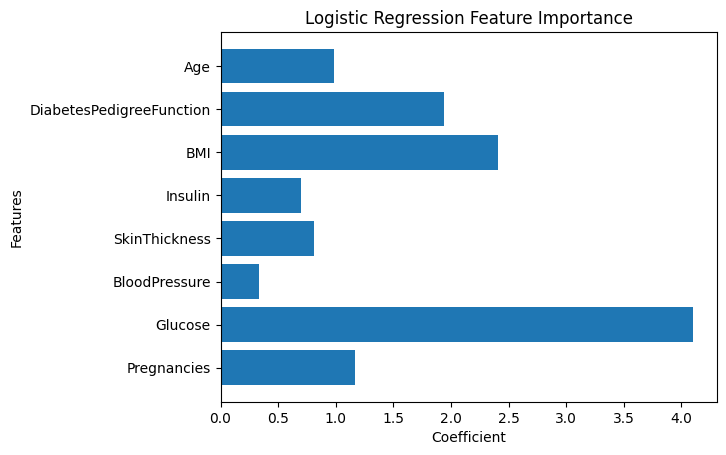

In [125]:
x_train, x_test, y_train, y_test = train_test_split( normalized_data, targets_df, test_size=0.3, random_state=0)

# train model
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

# get feature importance
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)

plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.show()


In [126]:
importance_df = pd.DataFrame({'Feature': input_df.columns,'Coefficient': importance_weights}).sort_values(by='Coefficient', ascending=False)
importance_df

,Feature,Coefficient
1,Glucose,4.099175
5,BMI,2.411333
6,DiabetesPedigreeFunction,1.942921
0,Pregnancies,1.162822
7,Age,0.982257
3,SkinThickness,0.815314
4,Insulin,0.699785
2,BloodPressure,0.330785


Based on the coefficient analysis, Glucose, BMI, and DiabetesPedigreeFunction are the top 3 drivers of diabetes prediction.

Very high glucose levels are the most direct indicator of diabetes. This aligns with medical reality, since diabetes is defined by blood glucose dysregulation.High BMI indicates overweight/obesity and can risk of diabetes.The Diabetes Pedigree Function is an important, but not as dominant, predictor.

# **Linear Regression**

# Task 1

In [127]:
input_df = df_cleaned.drop(columns=['SkinThickness', 'Insulin', 'Glucose', 'DiabetesPedigreeFunction','Outcome'])
targets_df = df_cleaned['Glucose']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((724, 4), (724,))

In [128]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((506, 4), (506,), (218, 4), (218,))

# Task 2

In [129]:
model = LinearRegression()

In [130]:
model.fit(x_train,y_train)

LinearRegression()

In [131]:
y_pred = model.predict(x_test)
y_pred

array([104.82265557, 112.28635956, 121.29920575, 130.50518498,
       130.0424131 , 121.9700425 , 123.61663179, 152.08213195,
       125.04115182, 118.11515433, 108.60787012, 129.85047097,
       118.05608711, 137.71131154, 126.34566753, 138.38630466,
       114.30148697, 133.81811733, 105.50555836, 118.01763745,
       124.52305436, 142.85524698, 119.63563198, 127.32134176,
       116.51189919, 105.8623318 , 122.04249191, 120.39240074,
       129.09338174, 126.02722779, 123.34416727, 122.13661101,
       106.58305408, 129.40433284, 121.67147639, 132.80625207,
       119.68242849, 136.19884599, 113.46446786, 113.86744717,
       118.48271102, 136.79490289, 104.51618146, 142.68002396,
       113.04255773, 127.35878329, 107.7370819 , 118.34075776,
       139.26860686,  99.65126916, 128.73432722, 120.20358176,
       114.05404518, 119.42123023, 115.08546882, 114.21610441,
       126.96138691, 104.49126023, 106.70565827, 116.69215496,
       116.71690196, 118.37795323, 136.81702589, 137.49

In [132]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

,Actual,Predict
0,92.0,104.822656
1,111.0,112.286360
2,94.0,121.299206
3,180.0,130.505185
4,106.0,130.042413
...,...,...
213,127.0,107.655346
214,84.0,118.438340
215,166.0,125.227271
216,102.0,124.186589


In [133]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print("MAE:",mae)
print("MSE:",mse)

MAE: 22.484688978013715
MSE: 821.6513812155496


MAE has the same unit as the output variable,
also it is most robust to outliers and as mentioned before the dataset has many. Based on the results above, MAE = 22.48 means the model’s glucose prediction is off by about 22 mg/dL.  

MSE exaggerates the impact of outliers, cause it penalizes the outliers most and might give a distorted picture of average performance. Also the result is a squared unit of output so it is not as interpretable as MAE.

MAE is the more appropriate metric for evaluating glucose prediction, because it’s interpretable, robust to outliers, and reflects the average prediction error in the same units as the target.


Glucose is strongly influenced by many other factors that are not included in the input features. Using only Pregnancies, BloodPressure, BMI, and Age gives limited predictive power, so MAE around 22 mg/dL is reasonable for such a small and simplified model.

# Task 3

In [134]:
alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
results = []

for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=10000, random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    results.append({'Alpha': alpha, 'MAE': mae})

results_df = pd.DataFrame(results)
results_df

,Alpha,MAE
0,0.2,22.494541
1,0.4,22.504387
2,0.6,22.511492
3,0.8,22.517975
4,1.0,22.524458


As alpha increases, the penalty on coefficients becomes stronger, this tends to shrink coefficients and the model becomes simpler. This decreases accuracy slightly because the model can no longer fit the data as closely.
As we can see the MAE  increases gradually as alpha increases.

# Task 4

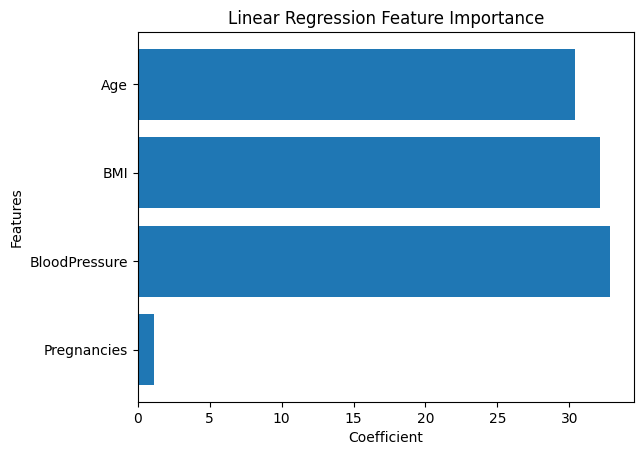

In [135]:
scaler = MinMaxScaler()
# transform the data (min-max normalization)
normalized_data = scaler.fit_transform(input_df)

x_train, x_test, y_train, y_test = train_test_split( normalized_data, targets_df, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)

coeffs = model.coef_
importance_weights = np.abs(coeffs)

plt.barh(input_df.columns, importance_weights)
plt.title('Linear Regression Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.show()

In [136]:
importance_df = pd.DataFrame({'Feature': input_df.columns,'Coefficient': importance_weights}).sort_values(by='Coefficient', ascending=False)
importance_df

,Feature,Coefficient
1,BloodPressure,32.838714
2,BMI,32.105547
3,Age,30.428944
0,Pregnancies,1.140897


In [137]:
input_df = df_cleaned.drop(columns=['Pregnancies','SkinThickness', 'Insulin', 'Glucose', 'DiabetesPedigreeFunction','Outcome'])
targets_df = df_cleaned['Glucose']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((724, 3), (724,))

In [138]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((506, 3), (506,), (218, 3), (218,))

In [139]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [143]:
y_pred = model.predict(x_test)
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

,Actual,Predict
0,92.0,104.736825
1,111.0,112.063169
2,94.0,121.171015
3,180.0,130.227179
4,106.0,130.452594
...,...,...
213,127.0,107.658877
214,84.0,118.305698
215,166.0,125.118052
216,102.0,124.305171


In [144]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print("MAE:",mae)
print("MSE:",mse)

MAE: 22.492031824090965
MSE: 822.2162157804672


Pregnancies had a much smaller coefficient than the others, even though its coefficient was small, it wasn’t introducing noise or overfitting.
The outcome shows Pregnancies is not a harmful feature, just not very informative. Removing it doesn’t make the model better or worse, it just makes it slightly simpler.